In [1]:
import csv
import copy 
import matplotlib
import pandas

# Allows you to render matplotlib graphs in the same notebook
%matplotlib inline 

def plot_dict(d, label="Please Label Me!!!"):
    ax = pandas.Series(d).sort_index().plot.bar(color="black", fontsize=16)
    ax.set_ylabel(label, fontsize=16)

In [2]:
#project 8 functions

#read in data
def read_csv(filedir):
    try:
        data = open(filedir, encoding = "utf-8")
    except e:
        raise e
    csv_reader = csv.reader(data)
    csv_data   = list(csv_reader)
    data.close()
    
    return csv_data

#Data Plumbing Functions
def get_mapping(path):
    mapping  = read_csv(path)
    map_dict = {}
    
    #iterate through the data & add the id/name to the dict
    for i in mapping:
        map_dict[i[0]] = i[1]
    return map_dict
    
def get_raw_movies(path):
    movies = read_csv(path)
    movie_h, movie_d = (movies[0], movies[1:]) #h-> header, d->data
    
    #iterate through the data and append each movie data as a dict
    #'title', 'year', 'rating', 'directors', 'actors', and 'genres'
    movies   = []
    
    for curr_movie in movie_d:
        movie_dict = {}
        
        # i iterates through the column of the curr_movie
        i = 0
        for header in movie_h:
            movie_dict[header] = curr_movie[i]
            i += 1
            
        movies.append(movie_dict)
    return movies
    

def get_movies(movies_path, mapping_path):
    movies  = get_raw_movies(movies_path)
    mapping = get_mapping(mapping_path)
    
    
    for movie in movies:
        #----------------- convert the title ----------------------------------------- #
        movie["title"] = mapping[movie["title"]]
        
        #-----------------  convert the director string into names by first converting them into lists------------ #
        
        movie["directors"] = movie["directors"].split(",")
        
        #for each director get the ID from the mapping dict
        for i in range(len(movie["directors"])):
            movie["directors"][i] = mapping[movie["directors"][i]]
        
        #-----------------  convert the actor string into names by first converting them into lists--------------- #
        movie["actors"] = movie["actors"].split(",")
        
        #for each actor get the ID from the mapping dict
        for i in range(len(movie["actors"])):
            movie["actors"][i] = mapping[movie["actors"][i]]
            
        #converting year and rating into appropriate types
        movie["year"]   = int(movie["year"])
        movie["rating"] = float(movie["rating"])
        
        #-----------------  convert the genre string into a list--------------- #
        movie["genres"] = movie["genres"].split(',')
    return movies
    

In [3]:
# load in movies
movies = get_movies("movies.csv", "mapping.csv")

In [4]:
#q1
q1 = []

for movie in movies:
    if len(movie['actors']) < 4:
        q1.append(movie["rating"])

sum(q1)/len(q1)

6.380867346938772

In [5]:
#q2
q1 = []

for movie in movies:
    if len(movie['actors']) > 5:
        q1.append(movie["rating"])

sum(q1)/len(q1)


6.742857142857143

In [6]:
#q3
q3 = []

for movie in movies:
    if (movie['title'][0].lower() == 'a'):
        q3.append(movie["rating"])

sum(q3)/len(q3)



6.413599999999994

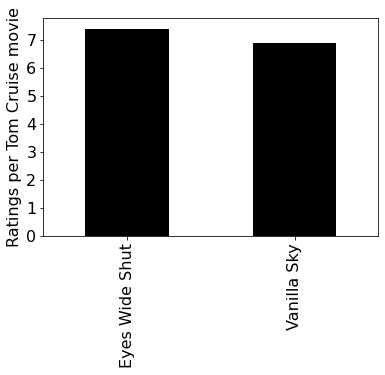

In [7]:
#q4

def plot_title_vs_rating(actor):
    #use list comprehension to find the movies actor is in
    act_movies = [movie for movie in movies if actor in movie["actors"]]
    
    #convert the list into the data set required by the question
    data = {}
    
    for movie in act_movies:
        data[movie["title"]] = movie["rating"]
    
    #plot the dict
    plot_dict(data, "Ratings per {} movie".format(actor))
    
    
plot_title_vs_rating("Tom Cruise")

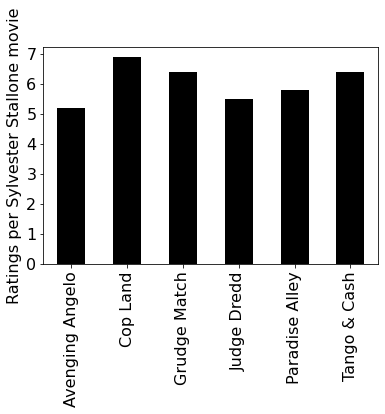

In [8]:
#q5
plot_title_vs_rating("Sylvester Stallone")

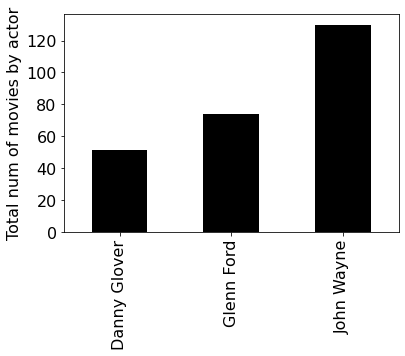

In [9]:
#q6
def tot_movies_acted(actor):
    
    #to get the total # of movies: create a list of all the movies the actor has been in then return the len
    return len( [movie for movie in movies if actor in movie["actors"]] )

q6 = {"John Wayne":tot_movies_acted("John Wayne"), "Glenn Ford":tot_movies_acted("Glenn Ford"), 
       "Danny Glover":tot_movies_acted( "Danny Glover")}

plot_dict(q6, "Total num of movies by actor")

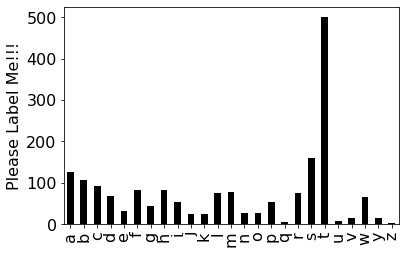

In [10]:
#q7
q7 = {}

for movie in movies:
    letter = movie["title"][0].lower()

    #use isalpha() to make sure that the title begins with a letter
    if(letter.isalpha() and letter not in q7):
        q7[letter] = 1
    elif (letter.isalpha() and letter in q7):
        q7[letter] += 1
    
plot_dict(q7)

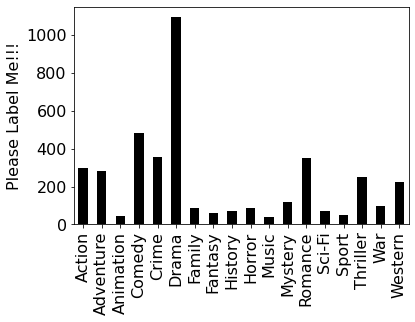

In [11]:
#q8
q8 = {}

for movie in movies:
    for genre in movie["genres"]:
        if genre not in q8:
            q8[genre] = 0
        q8[genre] += 1
plot_dict(q8)

In [12]:
#q9

#q9 key-value pair structure-> letter:list of ratings
q9 = {}

for movie in movies:
    letter = movie['title'][0].lower()
    isalpha = letter.isalpha()
    
    if isalpha and letter not in q9:
        q9[letter] = [movie["rating"]]
    elif isalpha and letter in q9:
        q9[letter].append(movie["rating"])
    
# iterate through q9 and get the averages of each letter
  
def dict_lis_avg(dict_):
    
    lis_avgs = {}
    for key,list_ in dict_.items():
        lis_avgs[key] = sum(list_)/len(list_)
    return lis_avgs
    
    
# q9_avgs = {}
# for letter in q9:
#     let_lis = q9[letter]
#     q9[letter] = sum(let_lis)/len(let_lis)

dict_lis_avg(q9)

{'t': 6.5432000000000015,
 'i': 6.714814814814817,
 'a': 6.413599999999994,
 'f': 6.375609756097562,
 'l': 6.172368421052631,
 'r': 6.371052631578949,
 'p': 6.160377358490566,
 's': 6.216352201257862,
 'w': 6.243076923076923,
 'b': 6.312264150943395,
 'm': 6.650000000000002,
 'k': 6.316666666666666,
 'o': 6.5814814814814815,
 'c': 6.337362637362637,
 'h': 6.476829268292684,
 'g': 6.443181818181819,
 'u': 6.15,
 'n': 6.348148148148147,
 'd': 6.297101449275363,
 'e': 6.128125000000001,
 'y': 6.285714285714286,
 'v': 6.1000000000000005,
 'q': 6.7,
 'j': 6.375,
 'z': 6.833333333333333}

In [13]:
#q10

q10 = {}

for movie in movies:
    mov_genres = movie["genres"]
    
    #if there are any new genres, append that genre to q10
    #if genre already exists in q10 append the movie rating to that genre
    for genre in mov_genres:
        if genre not in q10:
            q10[genre] = [movie["rating"]]
        else:
            q10[genre].append(movie["rating"])
            
dict_lis_avg(q10)

{'Comedy': 6.3146391752577395,
 'Drama': 6.529707495429615,
 'Romance': 6.474147727272729,
 'History': 6.661643835616438,
 'Family': 6.512941176470589,
 'Mystery': 6.275206611570249,
 'Thriller': 5.981999999999998,
 'Action': 6.125752508361202,
 'Crime': 6.355182072829133,
 'Adventure': 6.612367491166079,
 'Western': 6.455309734513275,
 'Music': 6.3947368421052655,
 'Animation': 7.1533333333333315,
 'Sport': 6.527083333333334,
 'Fantasy': 6.405084745762712,
 'War': 6.771717171717175,
 'Sci-Fi': 6.104347826086958,
 'Horror': 5.724705882352941}

In [14]:
# q11
q11 = {}

# use the list from q10 and count the # of movies with rating>4
for genre, ratings in q10.items():
    q11[genre] = 0
    for rating in ratings:
        q11[genre] += 1 if rating > 4.0 else 0
        
q11

{'Comedy': 484,
 'Drama': 1085,
 'Romance': 352,
 'History': 73,
 'Family': 84,
 'Mystery': 117,
 'Thriller': 243,
 'Action': 289,
 'Crime': 351,
 'Adventure': 280,
 'Western': 226,
 'Music': 38,
 'Animation': 45,
 'Sport': 47,
 'Fantasy': 58,
 'War': 99,
 'Sci-Fi': 67,
 'Horror': 81}

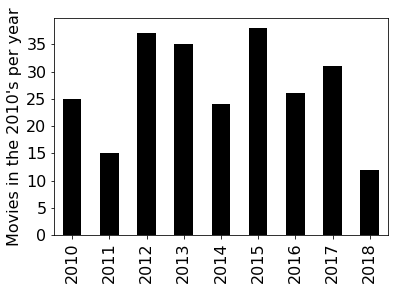

In [15]:
# q12

#arbitrary min, max years to get all years
def find_movies_in_range(year1 = 0, year2 = 3000):
    
    mov_in_range = {}
    for movie in movies:
        mov_year = movie["year"]
        
        #skip if year not in range
        if not year1 <= mov_year <= year2:
            continue
            
        try:
            mov_in_range[mov_year] += 1
        except KeyError:
            mov_in_range[mov_year] = 1
            
    return mov_in_range

q12 = find_movies_in_range(2010, 2020)    
plot_dict(q12, "Movies in the 2010's per year")

In [16]:
#q13

movies_by_year = find_movies_in_range()
q13 = [sorted(movies_by_year.items(), key=lambda x:x[1], reverse=True)[0][0]]

q13

[2015]

In [17]:
#q14

def get_5_genres(rev = False):
    #we can use the list from q10 since it has the ratings for each genre, len(list of ratings) = num of movies 
    movies_by_genres = [(genre, len(ratings)) for genre, ratings in q10.items()]
    
    #sort the above list and slice for first five
    genre_count = sorted(movies_by_genres, key = lambda x:x[1], reverse = rev)[:5]
    
    #isolate the genres    
    return [genre[0] for genre in genre_count]


get_5_genres()

['Music', 'Animation', 'Sport', 'Fantasy', 'Sci-Fi']

In [18]:
#q15

#pass rev=True to get the 5 most genres
get_5_genres(True)

['Drama', 'Comedy', 'Crime', 'Romance', 'Action']

In [19]:
#q16

def get_actors():
        #get the num of movies by actor
    num_featured = {}
    
    for movie in movies:
        actors = movie["actors"]
        
        for act in actors:
            try:
                num_featured[act] += 1
            except KeyError:
                num_featured[act] = 1
            except e:
                raise e
                
    #convert the dict into a list of tuples (where each touple is the actor, count kvp)
    return [(actor, count) for actor, count in num_featured.items()]

def get_x_top_actors(top_num_actors):
    #sort the actors by count then return the actor names
    top_x_actors = get_actors()
    top_x_actors = sorted(top_x_actors, key = lambda x:x[1], reverse = True)[:top_num_actors]
    return [actor[0] for actor in top_x_actors]


#sort the list
get_x_top_actors(10)

['John Wayne',
 'Eric Roberts',
 'Mickey Rooney',
 'Anthony Quinn',
 'Henry Fonda',
 'Randolph Scott',
 'Robert De Niro',
 'Robert Mitchum',
 'Glenn Ford',
 'George Sanders']

In [20]:
#q17

#index 0th to get the expected type
get_x_top_actors(1)[0]

'John Wayne'

In [21]:
#q18

q18 = get_actors()
#sort actor count by least count to. most count
q18 = sorted(q18, key = lambda x:x[1])

#iterate through q18 until we find actors with more than one movie
act_one = 0

for actor, count in q18:
    if count > 1:
        break
    act_one += 1

act_one

1926

In [22]:
#q19

def get_ratings(slice_max, rev = True):
    ratings = []
    
    for i, movie in enumerate(movies):
        ratings.append((movie["title"], movie["rating"]))
    
    ratings = sorted(ratings, key = lambda x:x[1], reverse = rev)[:slice_max]
    
    return [movie for movie, rating, in ratings]

get_ratings(3)

['The Godfather', 'The Godfather: Part II', 'The Dark Knight']

In [23]:
#q20
get_ratings(19, False)

['Silk',
 'Stealing Las Vegas',
 'Singularity',
 'Body and Soul',
 'Garden of the Dead',
 'Beyond the Ring',
 "Hitman's Run",
 'Betrayal',
 "Jake's Road",
 'The Trouble with Spies',
 '2 Bedroom 1 Bath',
 'Victim of Desire',
 'Arsenal',
 'Woman of Desire',
 'Sweet Justice',
 'Falcon Beach',
 'The Flying Dutchman',
 'The Mark: Redemption',
 'The Steam Experiment']